# Datamining and Statistics </br>
## Assessment 1 </br>
This is the first assessment of Datamining and Statistics
### NASA Near Earth Objects Orbit Elements
In this assessment we use the NASA Near Eath Objects Orbit Elements dataset. These objects are and comets orbiting in our solar system. <br>
This dataset contains some comets and other earth orbiting objects like a few asteroids. <br>
This assessment shows the relation of, for example, the eccentricity and the period of an comet. We do this by applying linear regression.
After that is done, multivariate regression will be applied. <br>
Before we start a little introduction including terminilogy. <br>
The eccentricity means the shape of the orbit of the comet. <br>
The Period in years is the rotation period of the comet. <br>
The MOID, minimum orbit intersection distamce. This distance means the closest point between two bodies. The MOID is defined in astronomical units.

In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

import eli5 
from eli5.sklearn import PermutationImportance

Using TensorFlow backend.


Loading the CSV file for the next tasks.
Head shows the first 5 rows of the loaded CSV file. This shows us several columns of data from the comets.

In [3]:
df = pd.read_csv('Near_earth_Comets.csv')
df.head()

Object  Epoch (TDB)     TP (TDB)         e  \
0           P/2004 R1 (McNaught)        54629  2455248.548  0.682527   
1  P/2008 S1 (Catalina-McNaught)        55101  2454741.329  0.666313   
2                      1P/Halley        49400  2446467.395  0.967143   
3                       2P/Encke        56870  2456618.204  0.848268   
4                       3D/Biela        -9480  2390514.115  0.751299   

      i (deg)     w (deg)  Node (deg)    q (AU)  Q (AU)  P (yr)  MOID (AU)  \
0    4.894556    0.626838  295.985450  0.986192    5.23    5.48   0.027011   
1   15.100746  203.649023  111.392003  1.190642    5.95    6.74   0.194101   
2  162.262691  111.332485   58.420081  0.585978   35.08   75.32   0.063782   
3   11.779995  186.540346  334.569806  0.336092    4.09    3.30   0.173092   
4   13.216400  221.658800  250.669000  0.879073    6.19    6.65   0.000518   

    A1 (AU/d^2)   A2 (AU/d^2)  A3 (AU/d^2)  DT (d)       ref  \
0           NaN           NaN          NaN     NaN        20   
1           NaN           NaN          NaN     NaN        13   
2  2.700000e-10  1.550000e-10          NaN     NaN   J863/77   
3  1.580000e-10 -5.050000e-12          NaN     NaN        74   
4  3.900000e-09 -2.540000e-10          NaN     NaN  IAUCAT03   

                     Object_name  
0           P/2004 R1 (McNaught)  
1  P/2008 S1 (Catalina-McNaught)  
2                      1P/Halley  
3                       2P/Encke  
4                       3D/Biela

## Loading the columns from the CSV into numpy array and reshape to one-dimension </br>
We load the columns into seperate variables. This includes a reshape to the numpy array. <br>
from this step on, we chose for the eccentricity, the moid and period of the comet. This will keep it simple, instead adding more variables.


In [23]:
eccentricity = df["e"].to_numpy().reshape((-1,1))
moid_au = df["MOID (AU)"].to_numpy().reshape((-1,1))
period = df["P (yr)"].to_numpy().reshape((-1,1))

## Results of the linear coefficient<br>
This can be done using the manual way, the sklearn way or the statsmodel. The block of code shows the sklean way of calculating the slope, intercept and coefficient. <br>
In this case we chose for the sklearn method. 

The slope (b1):  0.002307871781209747
The intercept (b0):  0.713056395061496
Coefficient of determination:  0.3663346668857749


Text(0.5, 1.0, 'Linear rogression between period and eccentricity')

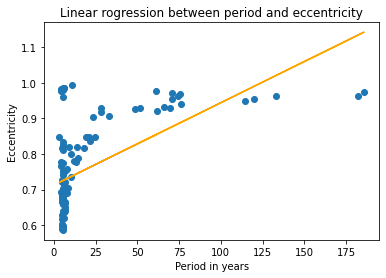

In [5]:
# reshaping the x and y var's
x = period.reshape((-1,1))
y = eccentricity.reshape((-1,1))

# fitting the model
model = LinearRegression().fit(x,y)
b1=model.coef_[0]
b1V2=model.coef_[0]
b0V2=model.intercept_

# printing the slope
print('The slope (b1): ',b1V2[0])

# printing the intercept
b0=model.intercept_
print('The intercept (b0): ',b0V2[0])

# prediciting the model
yPred = model.predict(x)

# print the coefficient
det=metrics.r2_score(y,yPred)
print('Coefficient of determination: ',det)

plt.scatter(x,y)
coff = b0+b1*x
plt.plot(x, coff, color='orange')
plt.xlabel('Period in years')
plt.ylabel('Eccentricity')
plt.title('Linear rogression between period and eccentricity')

The slope (b1):  0.29955868472680164
The intercept (b0):  0.713009623504487
Coefficient of determination:  0.1050473381937842


Text(0.5, 1.0, 'Linear rogression between MOID and eccentricity')

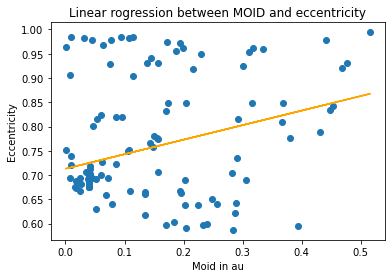

In [6]:
# reshaping the x and y var's
x = moid_au.reshape((-1,1))
y = eccentricity.reshape((-1,1))

# fitting the model
model = LinearRegression().fit(x,y)
b1=model.coef_[0]
b1V2=model.coef_[0]
b0V2=model.intercept_

# printing the slope
print('The slope (b1): ',b1V2[0])

# printing the intercept
b0=model.intercept_
print('The intercept (b0): ',b0V2[0])

# prediciting the model
yPred = model.predict(x)

# print the coefficient
det=metrics.r2_score(y,yPred)
print('Coefficient of determination: ',det)

# generate and print the plot
plt.scatter(x,y)
coff = b0+b1*x
plt.plot(x, coff, color='orange')
plt.xlabel('Moid in au')
plt.ylabel('Eccentricity')
plt.title('Linear rogression between MOID and eccentricity')

## Conclusion of the linear regression
We see that the coefficient of determination between the eccentricity and the period is 0.36. That means that there is a relation present between the eccentricity and the period of the comet. <br>
The x-axis stands for the Period in years. The y-axis stands for the eccentricity. We see that the bigger the period in years, the higher the eccentricity is. <br>
This isn't unexpected, but this linear regression shows it well. <br>
The coefficient between the eccentricity and the MOID is bit lower. The outcome was 0.10. So the relation between those two is lower that the period and the eccentricity. <br>
Now that we have made two linear regressions, it's time for a multiple linear regression between those 3 values.


# Multiple linear regression <br>
In this part the multiple linear regression will be made out of these 3 columns from the CSV file. This part will show the relation between the eccentricity, period and the moid. <br>
First of all, a function is made for calculating the regression with two vars as input. We combine the results from this function.


In [7]:
# function for calculating the linear regression
def linearRegression(xVal, yVal):
    model = LinearRegression().fit(xVal,yVal)
    yPred = model.predict(xVal)
    b1V2=model.coef_[0]
    print('The slope (b1): ',b1V2)

    b0V2=model.intercept_
    print('The intercept (b0): ',b0V2[0])
    det2=metrics.r2_score(yVal,yPred)
    print('Coefficient of determination: ',det2)

In [8]:
multiX = np.hstack((period, moid_au))
linearRegression(multiX, eccentricity)

The slope (b1):  [0.00212848 0.14910588]
The intercept (b0):  0.6979836738677431
Coefficient of determination:  0.3901475853178402


The result above shows us that the combination of the eccentricity, period and the moid has a higher coefficient then when separated. So this is one step forward! <br>
## Adjusted determination coefficient <br>
The previous coefficient was calculated based on two variables, now let's try that with one more. The determination will change. <br>
* Define the model (based on multiX and the eccentricity)
* Make a prediction based on the multiX
* With the prediction we make a determination
Now with the following formula we can calculate the adjustedDetermination
\begin{equation}
\bar{r}^2=1-(1-r^2)\frac{n-1}{n-p-1}
\end{equation}
* Here is r^2 is determination, n is eccentricity and p is multiX (the hstack)



In [9]:
multiModel = LinearRegression().fit(multiX, eccentricity)
yPred = multiModel.predict(multiX)
determination = metrics.r2_score(eccentricity,yPred)

adjDet = 1 - (1 - determination) * (eccentricity.shape[0] - 1) / (eccentricity.shape[0] - multiX.shape[1] - 1)

print(adjDet)

0.38237876474864074


# Training validation and Holdout <br>
In the next part we are going to test and train the model using the CSV file. <br>
* First we load the datafile
* Importing the columns (just like above)
* Importing the function from sklearn
* Giving the values
* Chosing the test/validation size, in this case it is 40% (0.4)
* Saving the data in x and y variables

In [10]:
df = pd.read_csv('Near_Earth_Comets.csv')

x = df[['P (yr)', 'MOID (AU)']]
y = df['e']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

Next step is creating the model with the real train and test data. <br>
The fit() function handles the rest for us. Offcourse will the model be saved into a variable for further processing.

In [11]:
model = LinearRegression().fit(X_train,y_train) # To train the model. Only fit the training data.

Right now we need to check the values. So let's print something!

In [12]:
print('Intercept:', model.intercept_)
coefficientsTable = pd.DataFrame( model.coef_,              
                                  X_train.columns,         
                                  columns=['Coefficient'])
                                                                    
coefficientsTable.head(2)

Intercept: 0.7132054154425899


Coefficient
P (yr)        0.002122
MOID (AU)    -0.002902

In [13]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [14]:
predictions = model.predict(X_test)

# Making plots and showing data <br>
We need to make 4 plots. 
* With the original data from the period
* Combined plot with period and eccentricity
* Original data from the MOID
* Combined plot with MOID and eccentricity 
<br>
<br>
After these plots, we will get an insight in how predictive our model is in prediction upcoming comets.


In [22]:
def combined_plot(x, y, line_color, plot_color):
    model     = LinearRegression().fit(x, y)
    yPred     = model.predict(x)
    gradient  = model.coef_[0]
    
    constant = model.intercept_
    
    prediction = constant + gradient * x
    
    plt.scatter(x, y)
    plt.plot(x, prediction, color=line_color)

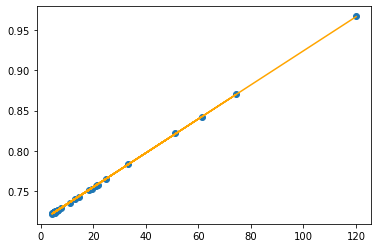

In [16]:
combined_plot(X_test['P (yr)'].to_numpy().reshape((-1,1)), predictions, 'orange', 'blue')

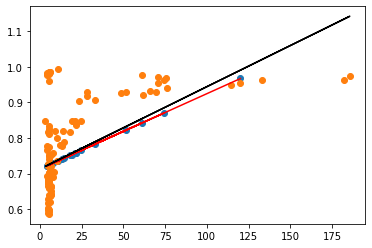

In [17]:
combined_plot(X_test['P (yr)'].to_numpy().reshape((-1,1)),predictions, 'red', 'blue')
combined_plot(period, eccentricity, 'black', 'orange')

# Conclusion period and eccentricity <br>
Prediction: red and blue <br>
Actual: black and orange <br>
We see that the actual and predicted values are very close together. The linear regression is almost the same. <br>

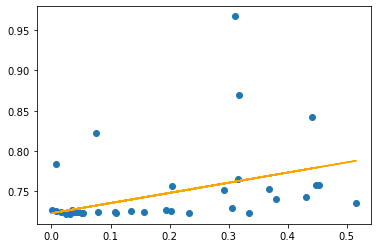

In [18]:
combined_plot(X_test['MOID (AU)'].to_numpy().reshape((-1,1)), predictions, 'orange', 'blue')

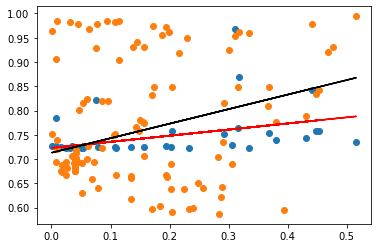

In [19]:
combined_plot(X_test['MOID (AU)'].to_numpy().reshape((-1,1)),predictions, 'red', 'blue')
combined_plot(moid_au, eccentricity, 'black', 'orange')

# Conclusion MOID and eccentricity <br>
In comparison to the period and the eccentricity we see that this regression is not as close as the other one. <br>
This seems very logical, because of the values in the dataset. We have less than 200 records, which isn't that much. <br>
This also confirms that the gap between most of the values is much higher than between the eccentricity and the period.

In [20]:
print('Intercept:', model.intercept_)
print('Coefficients',model.coef_)
X_train.columns

Intercept: 0.7132054154425899
Coefficients [ 0.00212235 -0.00290172]


Index(['P (yr)', 'MOID (AU)'], dtype='object')

In [21]:
model.score(X_test, y_test) * 100

31.631128573452916

# Conclusion <br>
As conclusion we can say that the multi linear regression showd us different aspects. This model and dataset will give us an 31% score. So 1/3 of the predictions are right. <br>
This score is a bit lower then the linear regressions combined with each other, but this one is more accurate. So we can conslude that about 1/3 of the upcoming comets are right predicted. <br>
So we can say, there is a relation between the eccentricity, the period and the moid distance. It's not a big relation, but it's definitely there.